In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
data = pd.read_csv('Lifeexpectancy.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           3253 non-null   object 
 1   Year             3253 non-null   int64  
 2   Life expectancy  3253 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.4+ KB


In [4]:
display(data.sample(5))


,Entity,Year,Life expectancy
2084,Mexico,1933,37.299999
84,Australia,1886,42.517452
197,Australia,1999,79.400002
1684,Italy,1967,71.059998
1433,India,1933,29.970079


In [6]:

#Checking for Null Values
print("Null Values")
display( data.isnull().sum())


Null Values


Entity             0
Year               0
Life expectancy    0
dtype: int64

In [7]:
#Looking at countries 
print("Countries")
display(data["Entity"].value_counts())
display(print(f"{data['Entity'].value_counts().count()} Countries in Data Set"))

Countries


Brazil            217
Canada            217
China             217
France            217
Germany           217
India             217
Italy             217
Japan             217
Mexico            217
Russia            217
Spain             217
Switzerland       217
United Kingdom    217
United States     217
Australia         215
Name: Entity, dtype: int64

15 Countries in Data Set


None

### as we see there are only 15 countries in dataset, so we need to create continets based on these countries.

In [8]:
##4Regions: Asia,Europe,North-America,South-America

asia = data.loc[data["Entity"].str.contains("China|Japan|India" ,case= True)]
europe = data.loc[data["Entity"].str.contains("Russia|Italy|Germany|Uk|France|Switzerland|Spain|United Kingdom")]
na = data.loc[data["Entity"].str.contains("Canada|United States" ,case= True)]
sa = data.loc[data["Entity"].str.contains("Mexico|Brazil",case= True)]

In [9]:
# Adding A New Column for Regions
data["Region"] = "l"
data["Region"]=data["Region"].astype("str")
data.loc[data["Entity"].str.contains("India|China|Japan"), "Region"] = 'Asia'
data.loc[data["Entity"].str.contains("Spain|Germany|Italy|Russia|France|Switzerland|United Kingdom"),"Region"] = "Europe"
data.loc[data["Entity"].str.contains("Mexico|Brazil"), "Region"] = 'South America'
data.loc[data["Entity"].str.contains("United States|Canada"), "Region"] = 'North America'
data.loc[data["Entity"].str.contains("Australia"), "Region"] = 'Oceiana'

display(data["Region"].value_counts())

Europe           1519
Asia              651
South America     434
North America     434
Oceiana           215
Name: Region, dtype: int64

In [14]:
display(data)
display(data[["Life expectancy"]].describe())


,Entity,Year,Life expectancy,Region
0,Australia,1802,34.049999,Oceiana
1,Australia,1803,34.049999,Oceiana
2,Australia,1804,34.049999,Oceiana
3,Australia,1805,34.049999,Oceiana
4,Australia,1806,34.049999,Oceiana
...,...,...,...,...
3248,United States,2012,78.940002,North America
3249,United States,2013,78.959999,North America
3250,United States,2014,78.940002,North America
3251,United States,2015,78.870003,North America


,Life expectancy
count,3253.000000
mean,48.680380
std,17.965669
min,8.108836
25%,32.000000
50%,41.880001
75%,66.820000
max,83.940002


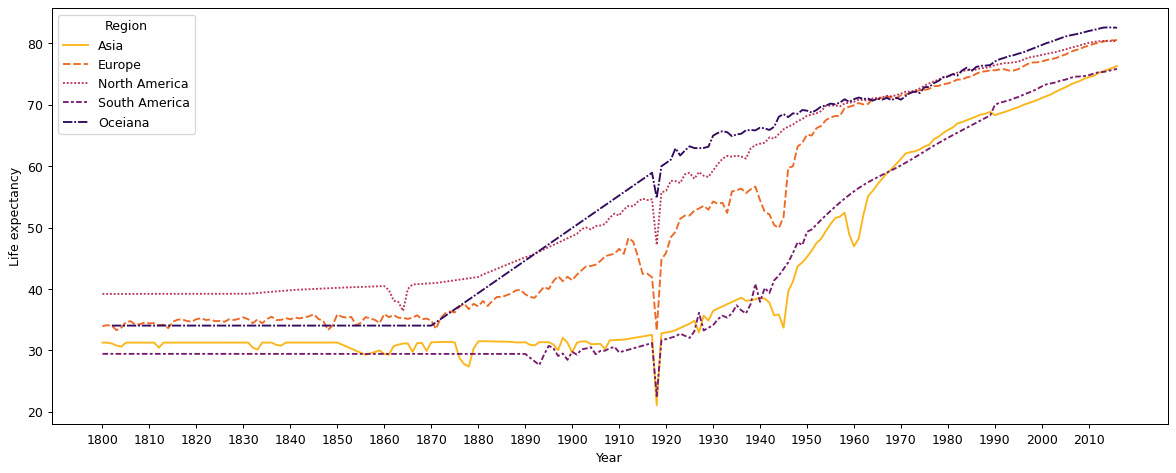

In [15]:
plt.figure(figsize = (16,6),dpi = 90)
sns.lineplot( x = "Year",y = "Life expectancy",hue= "Region" ,style = "Region" ,palette = "inferno_r",data = data.groupby(["Year","Region"],as_index = False)["Life expectancy"].mean(),linewidth = 1.5 )
plt.xticks(np.arange(1800,2020,10)) # for changing x shown years range by steps of 10 yrs.
plt.show()

scatter plot of the above:

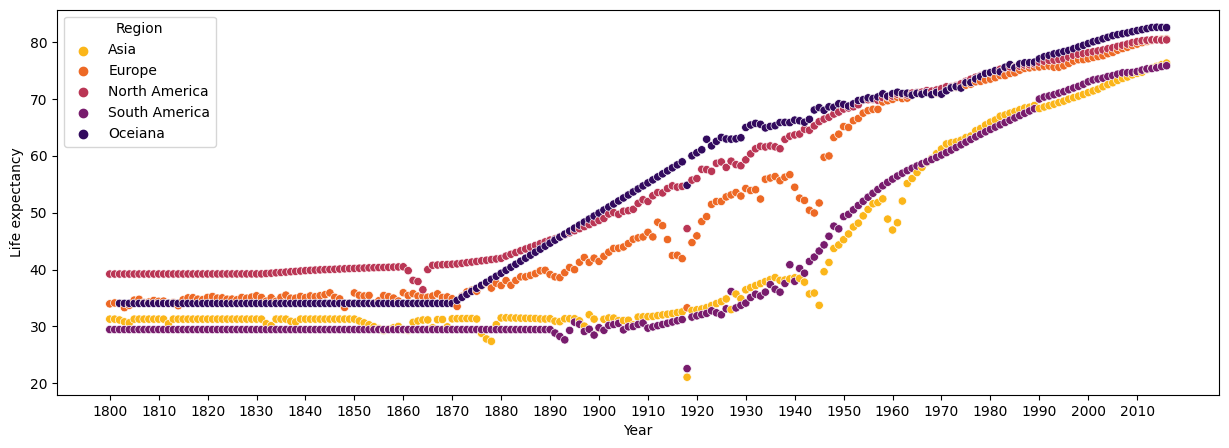

In [16]:
plt.figure(figsize = (15,5))
sns.scatterplot( x ="Year" , y="Life expectancy",hue = "Region" ,palette = "inferno_r",data = data.groupby(["Year","Region"],as_index = False)["Life expectancy"].mean())
plt.xticks(np.arange(1800,2020,10))
plt.show()

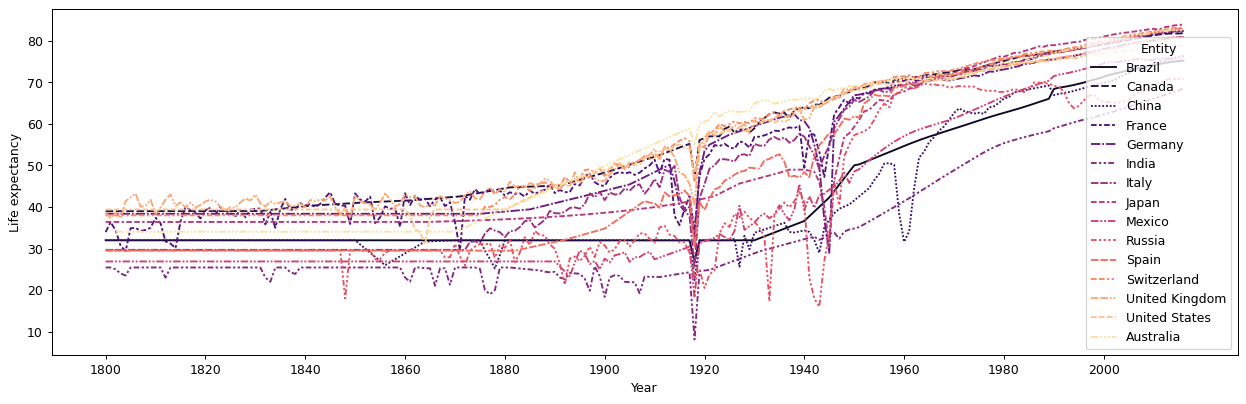

In [17]:
plt.figure(figsize = (17,5),dpi = 90)
sns.lineplot( x = "Year",y = "Life expectancy",hue= "Entity" ,style = "Entity" ,palette = "magma",data = data.groupby(["Year","Entity"],as_index = False)["Life expectancy"].mean())
plt.xticks(np.arange(1800,2020,20))
plt.show()

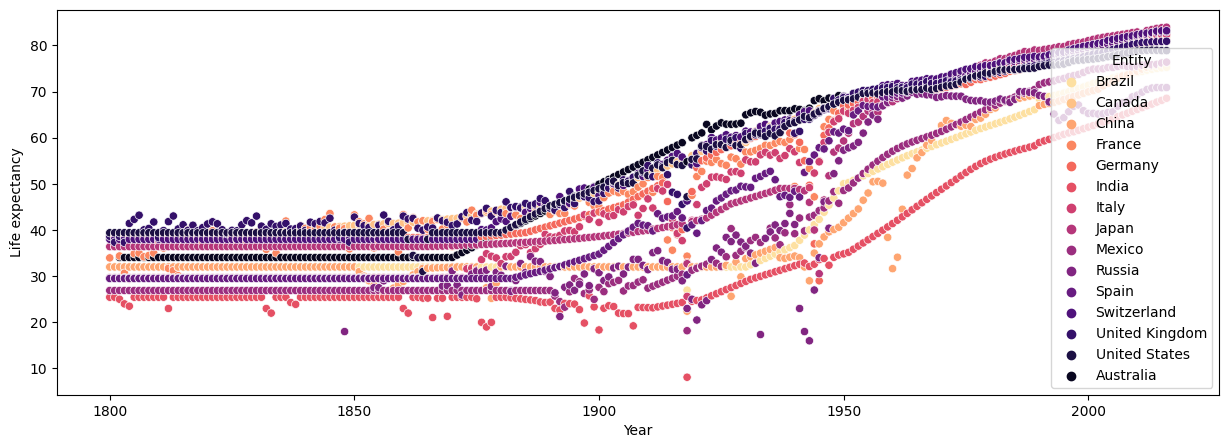

In [20]:
plt.figure(figsize = (15,5))

sns.scatterplot( x ="Year" , y="Life expectancy",hue = "Entity" ,palette = "magma_r",data = data.groupby(["Year","Entity"],as_index = False)["Life expectancy"].mean())
plt.show()